# Problem Statement

A University would like to effectively classify their students based on the program they are enrolled in. Perform multinomial <br>regression on the given dataset and provide insights (in the documentation). <br>
a.	prog: is a categorical variable indicating what type of program a student is in: “General” (1), “Academic” (2), or “Vocational” (3). <br>
b.	Ses: is a categorical variable indicating someone’s socioeconomic status: “Low” (1), “Middle” (2), and “High” (3). <br>
c.	read, write, math, and science are their scores on different tests. <br>
d.	honors: Whether they are an honor roll or not.


----- ##### ------

Lets load our datasets and necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,10)

In [8]:
data = pd.read_csv('mdata.csv')
data.shape

(200, 10)

We have 200 rows and 10 columns in our dataset

Lets explore our dataset

In [9]:
data.head()

,id,female,ses,schtyp,prog,read,write,math,science,honors
0,45,female,low,public,vocation,34,35,41,29,not enrolled
1,108,male,middle,public,general,34,33,41,36,not enrolled
2,15,male,high,public,vocation,39,39,44,26,not enrolled
3,67,male,low,public,vocation,37,37,42,33,not enrolled
4,153,male,middle,public,vocation,39,31,40,39,not enrolled


In [10]:
data.dtypes

id          int64
female     object
ses        object
schtyp     object
prog       object
read        int64
write       int64
math        int64
science     int64
honors     object
dtype: object

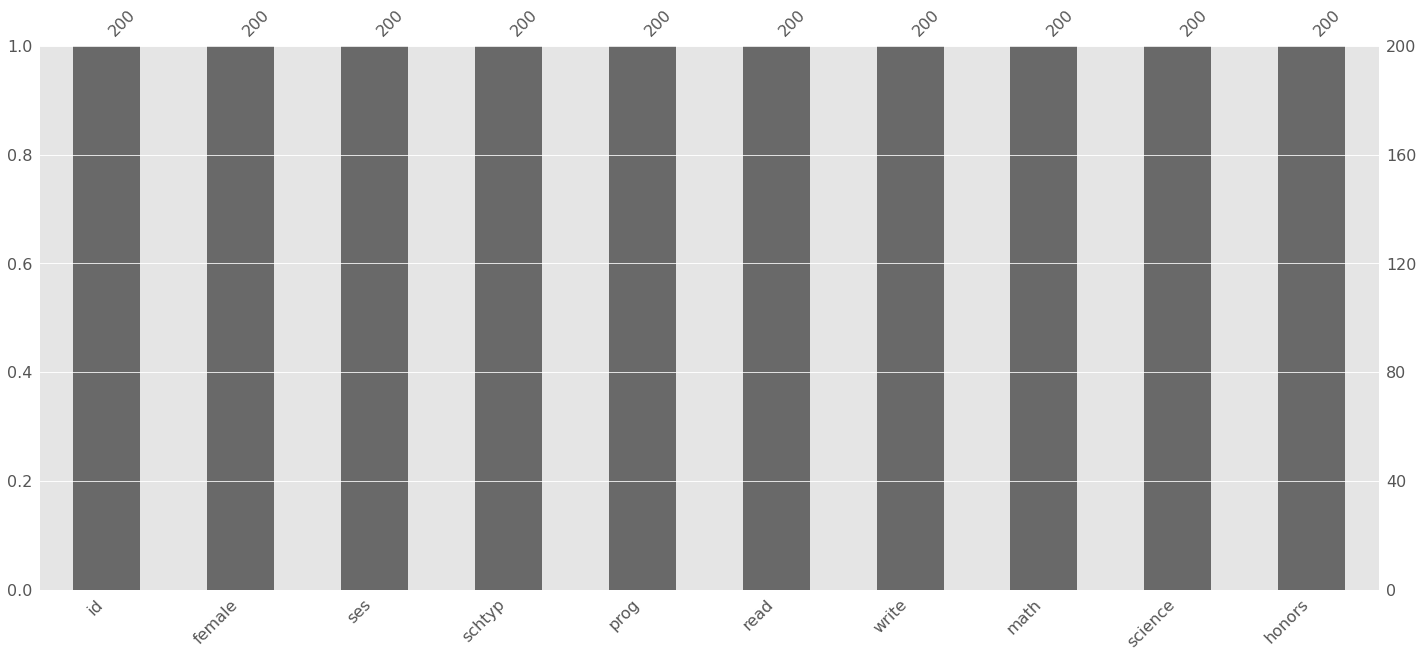

In [11]:
# Lets check for any missing value in our dataset

msno.bar(data)

There are no missing value in our dataset

In [12]:
# Lets explore the numeric variable in our dataset

data.describe()

,id,read,write,math,science
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,52.230000,52.775000,52.645000,51.850000
std,57.879185,10.252937,9.478586,9.368448,9.900891
min,1.000000,28.000000,31.000000,33.000000,26.000000
25%,50.750000,44.000000,45.750000,45.000000,44.000000
50%,100.500000,50.000000,54.000000,52.000000,53.000000
75%,150.250000,60.000000,60.000000,59.000000,58.000000
max,200.000000,76.000000,67.000000,75.000000,74.000000


In [16]:
data.columns

Index(['id', 'female', 'ses', 'schtyp', 'prog', 'read', 'write', 'math',
       'science', 'honors'],
      dtype='object')

In [17]:
data.female.value_counts()/data.shape[0]

female    0.545
male      0.455
Name: female, dtype: float64

In our data we have 55% population representated by Female and 45% by Male

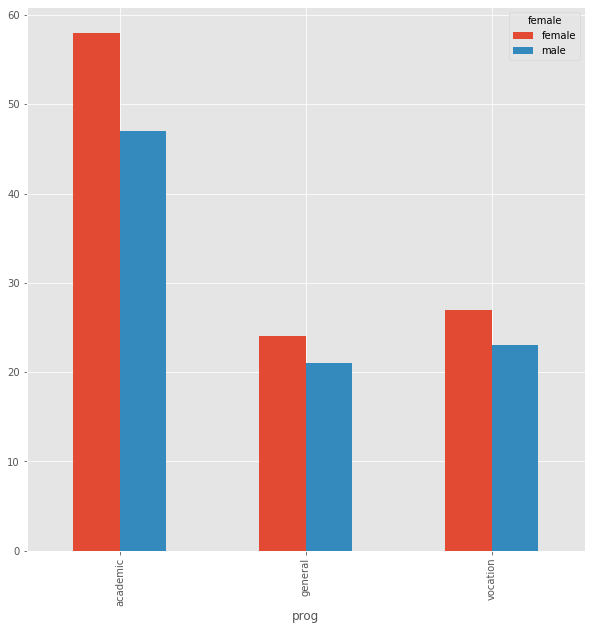

In [19]:
pd.crosstab(data['prog'],data['female']).plot(kind='bar')

In general we can see female have a higher enrollment in all programmes

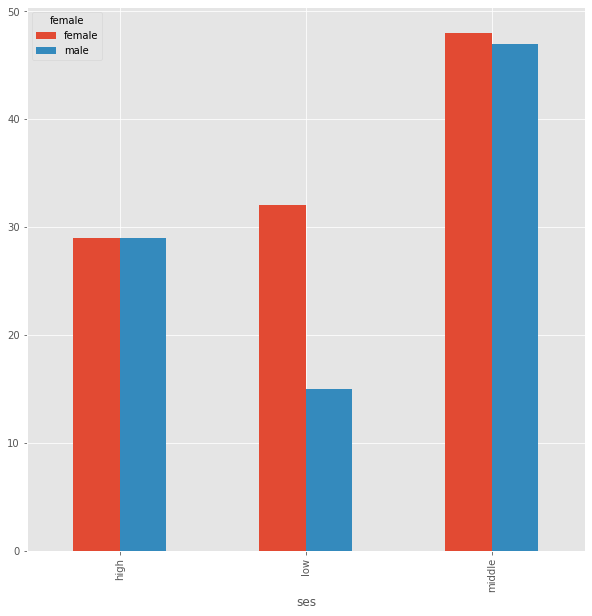

In [20]:
pd.crosstab(data['ses'],data['female']).plot(kind='bar')

In socioeconomic status, we can see equal number for High category, whereas Low category has majority of the respresentation from Female

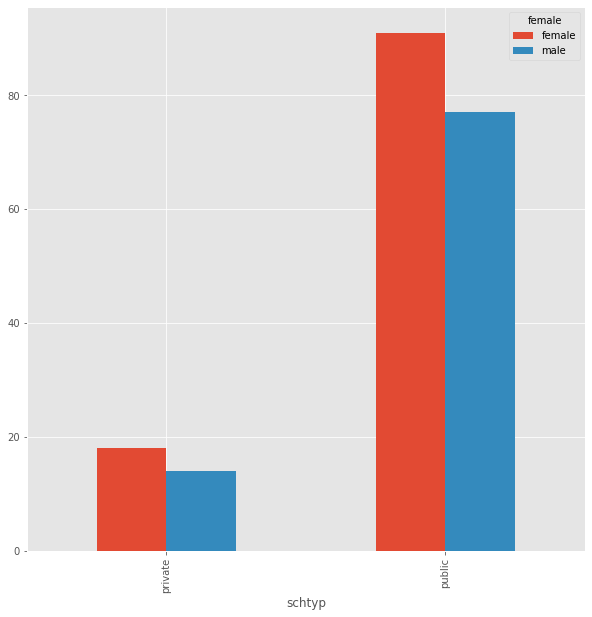

In [23]:
pd.crosstab(data['schtyp'],data['female']).plot(kind='bar')

Majority of the representation is from Public School

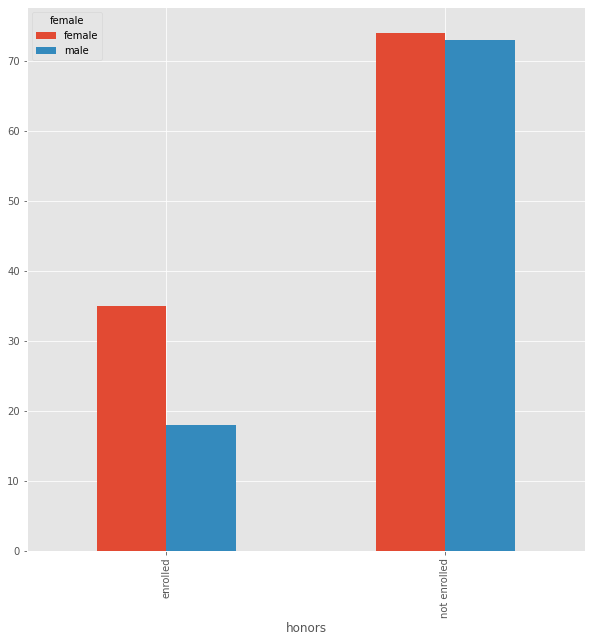

In [24]:
pd.crosstab(data['honors'],data['female']).plot(kind='bar')

There is a close to 50% difference in gender for honor enrollment

In [25]:
data.honors.value_counts()/data.shape[0]

not enrolled    0.735
enrolled        0.265
Name: honors, dtype: float64

73% of the data has not enrolled for honors and 27% of the data shows enrolled

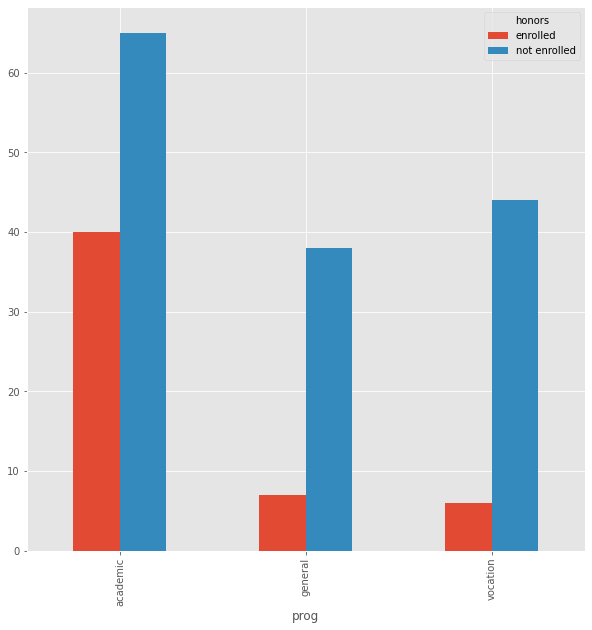

In [27]:
pd.crosstab(data['prog'],data['honors']).plot(kind='bar')

Close to 40 students who have enrolled are from Academic programme <br> Vocation has the least enrollment

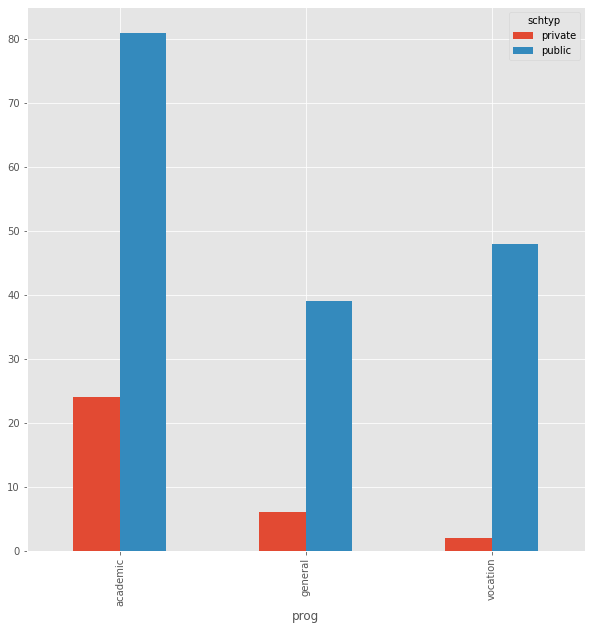

In [30]:
pd.crosstab(data['prog'],data['schtyp']).plot(kind='bar')

Lets visualize our dataset

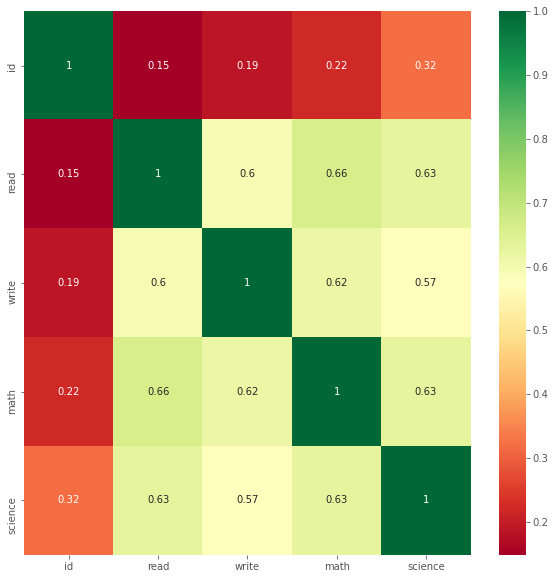

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [14]:
data.columns

Index(['id', 'female', 'ses', 'schtyp', 'prog', 'read', 'write', 'math',
       'science', 'honors'],
      dtype='object')

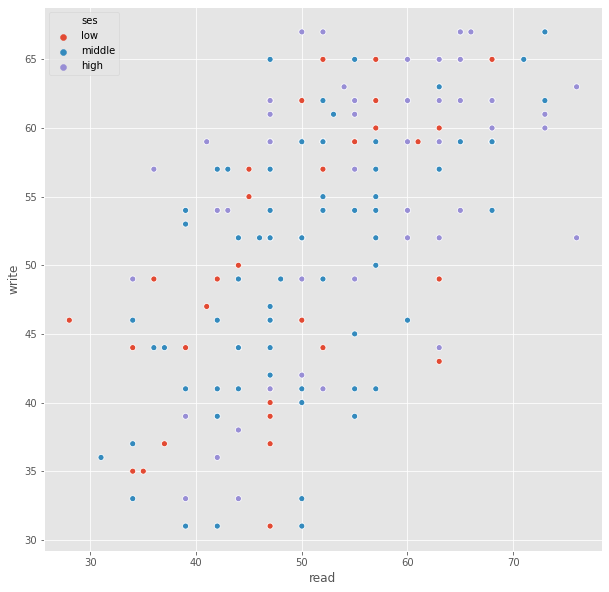

In [15]:
sns.scatterplot('read','write',hue='ses',data=data)

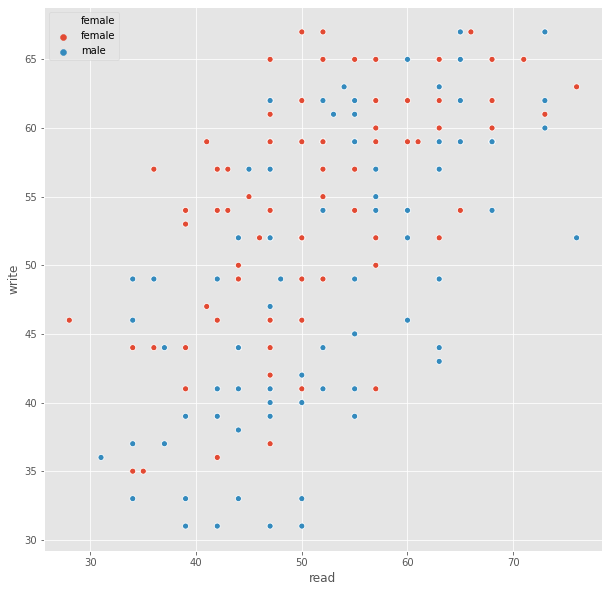

In [31]:
sns.scatterplot('read','write',hue='female',data=data)

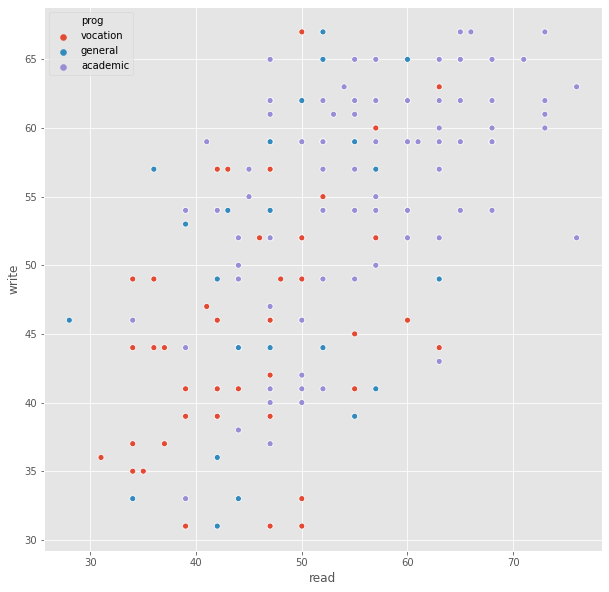

In [32]:
sns.scatterplot('read','write',hue='prog',data=data)

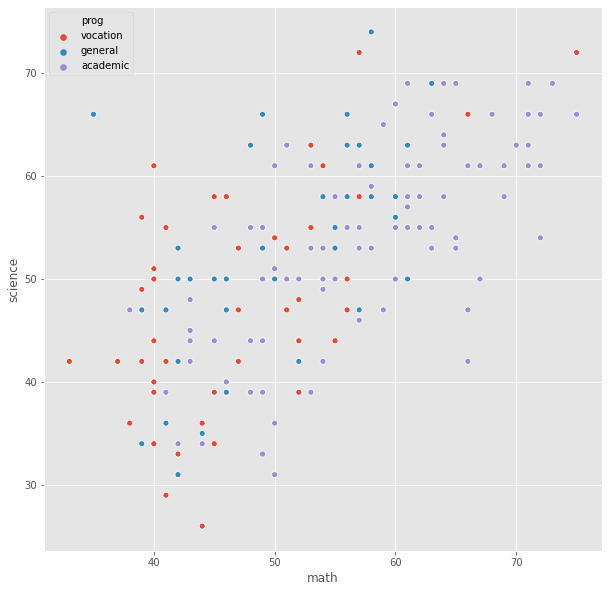

In [33]:
sns.scatterplot('math','science',hue='prog',data=data)

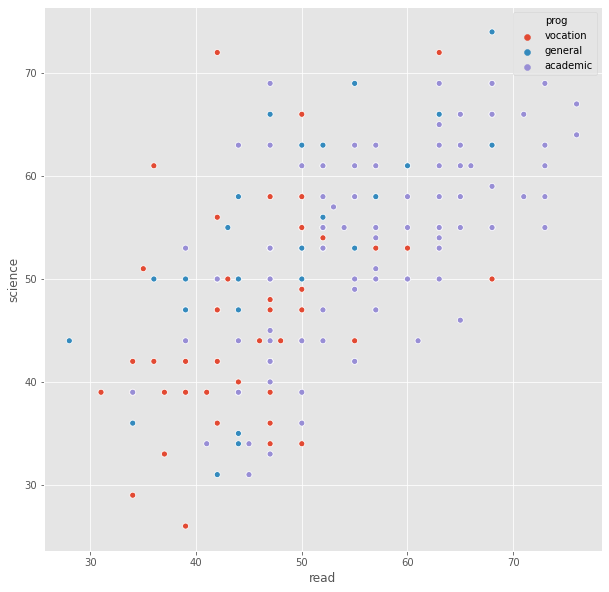

In [34]:
sns.scatterplot('read','science',hue='prog',data=data)

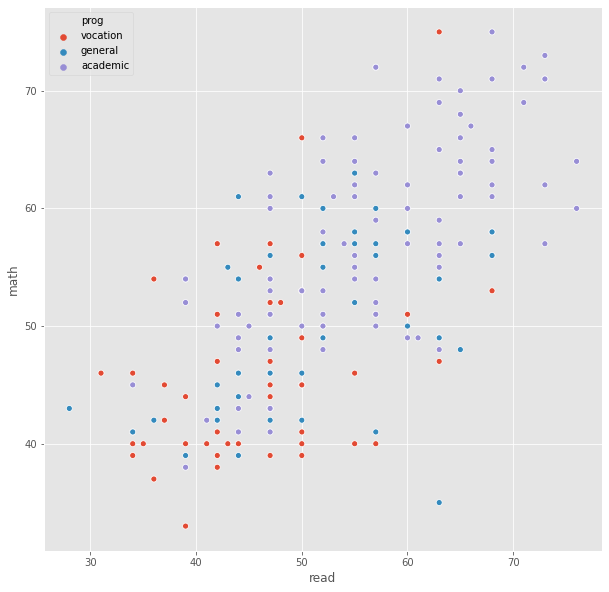

In [35]:
sns.scatterplot('read','math',hue='prog',data=data)

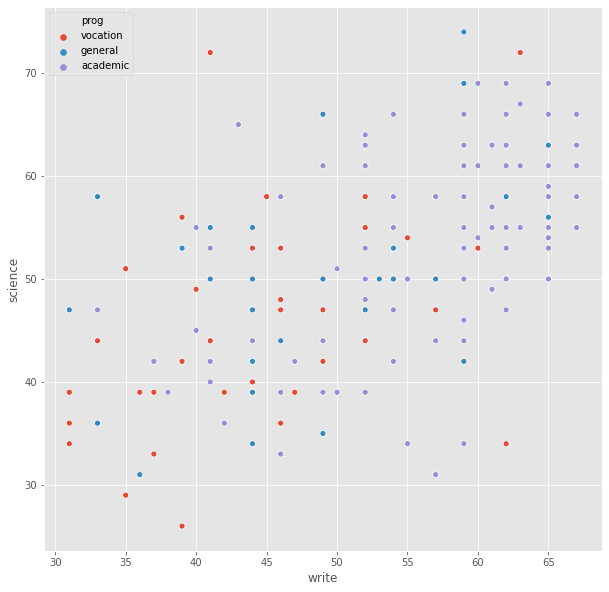

In [36]:
sns.scatterplot('write','science',hue='prog',data=data)

In [37]:
data.columns

Index(['id', 'female', 'ses', 'schtyp', 'prog', 'read', 'write', 'math',
       'science', 'honors'],
      dtype='object')

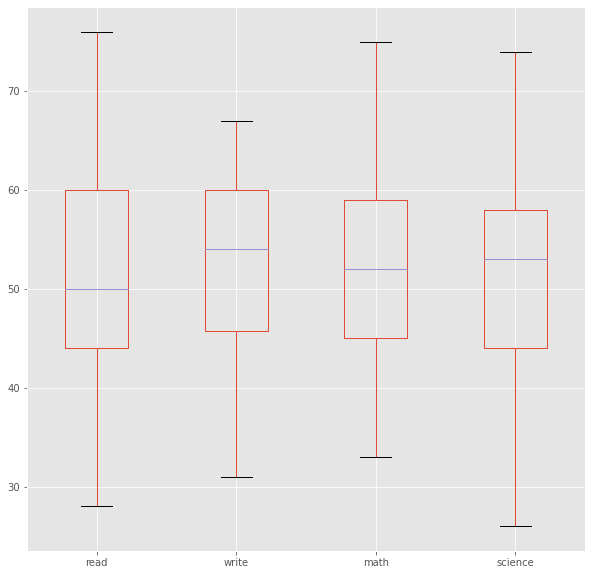

In [41]:
data[['read','write','math','science']].plot(kind='box')

There are no outliers in our dataset

Lets get Dummy variables for our categorical data

In [47]:
backup = data

In [48]:
from sklearn.preprocessing import LabelEncoder

In [50]:
labelencoder = LabelEncoder()
data['programme'] = labelencoder.fit_transform(data['prog'])
data

,id,female,ses,schtyp,prog,read,write,math,science,honors,programme
0,45,female,low,public,vocation,34,35,41,29,not enrolled,2
1,108,male,middle,public,general,34,33,41,36,not enrolled,1
2,15,male,high,public,vocation,39,39,44,26,not enrolled,2
3,67,male,low,public,vocation,37,37,42,33,not enrolled,2
4,153,male,middle,public,vocation,39,31,40,39,not enrolled,2
...,...,...,...,...,...,...,...,...,...,...,...
195,100,female,high,public,academic,63,65,71,69,enrolled,0
196,143,male,middle,public,vocation,63,63,75,72,enrolled,2
197,68,male,middle,public,academic,73,67,71,63,enrolled,0
198,57,female,middle,public,academic,71,65,72,66,enrolled,0


Since we have label encoded our Prog column we can drop this column from our dataset. <br>
0 is Academic <br>
1 is General <br>
2 is Vocation

In [51]:
data.drop(columns='prog', inplace=True)
data

,id,female,ses,schtyp,read,write,math,science,honors,programme
0,45,female,low,public,34,35,41,29,not enrolled,2
1,108,male,middle,public,34,33,41,36,not enrolled,1
2,15,male,high,public,39,39,44,26,not enrolled,2
3,67,male,low,public,37,37,42,33,not enrolled,2
4,153,male,middle,public,39,31,40,39,not enrolled,2
...,...,...,...,...,...,...,...,...,...,...
195,100,female,high,public,63,65,71,69,enrolled,0
196,143,male,middle,public,63,63,75,72,enrolled,2
197,68,male,middle,public,73,67,71,63,enrolled,0
198,57,female,middle,public,71,65,72,66,enrolled,0


In [52]:
backup = data

In [53]:
new_data = pd.get_dummies(data, drop_first=True)
new_data

,id,read,write,math,science,programme,female_male,ses_low,ses_middle,schtyp_public,honors_not enrolled
0,45,34,35,41,29,2,0,1,0,1,1
1,108,34,33,41,36,1,1,0,1,1,1
2,15,39,39,44,26,2,1,0,0,1,1
3,67,37,37,42,33,2,1,1,0,1,1
4,153,39,31,40,39,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
195,100,63,65,71,69,0,0,0,0,1,0
196,143,63,63,75,72,2,1,0,1,1,0
197,68,73,67,71,63,0,1,0,1,1,0
198,57,71,65,72,66,0,0,0,1,1,0


We have sucessfully, transformed our categorical variables into numeric variables and our Y output to 0 1 2

In [55]:
new_data.columns

Index(['id', 'read', 'write', 'math', 'science', 'programme', 'female_male',
       'ses_low', 'ses_middle', 'schtyp_public', 'honors_not enrolled'],
      dtype='object')

Lets build our model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
new_data = new_data[['programme','id', 'read', 'write', 'math', 'science','female_male',
       'ses_low', 'ses_middle', 'schtyp_public', 'honors_not enrolled']]
new_data

,programme,id,read,write,math,science,female_male,ses_low,ses_middle,schtyp_public,honors_not enrolled
0,2,45,34,35,41,29,0,1,0,1,1
1,1,108,34,33,41,36,1,0,1,1,1
2,2,15,39,39,44,26,1,0,0,1,1
3,2,67,37,37,42,33,1,1,0,1,1
4,2,153,39,31,40,39,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
195,0,100,63,65,71,69,0,0,0,1,0
196,2,143,63,63,75,72,1,0,1,1,0
197,0,68,73,67,71,63,1,0,1,1,0
198,0,57,71,65,72,66,0,0,1,1,0


In [67]:
train, test = train_test_split(new_data, test_size = 0.25)

In [68]:
print(train.shape,test.shape)

(150, 11) (50, 11)


In [69]:
train.programme.value_counts()/train.shape[0]

0    0.50
2    0.26
1    0.24
Name: programme, dtype: float64

In [70]:
test.programme.value_counts()/test.shape[0]

0    0.60
2    0.22
1    0.18
Name: programme, dtype: float64

In [72]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs').fit(train.iloc[:,1:],train.iloc[:,0])
test_predict = model.predict(test.iloc[:,1:])

C:\Users\jaic208\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# Test accuracy 
accuracy_score(test.iloc[:,0], test_predict)

0.56

In [75]:
train_predict = model.predict(train.iloc[:, 1:]) # Train predictions 
# Train accuracy 
accuracy_score(train.iloc[:,0], train_predict)

0.6333333333333333

Not a good accuracy, lets change solver to newton-cg and see if it improves

In [79]:
model1 = LogisticRegression(multi_class='multinomial', solver = 'newton-cg').fit(train.iloc[:,1:],train.iloc[:,0])
test_predict = model1.predict(test.iloc[:,1:])
test_predict

array([1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 0])

In [77]:
# Test accuracy 
accuracy_score(test.iloc[:,0], test_predict)

0.62

In [78]:
train_predict = model.predict(train.iloc[:, 1:]) # Train predictions 
# Train accuracy 
accuracy_score(train.iloc[:,0], train_predict)

0.6333333333333333

We are getting better accuracy from Newton-CG as solver.